# Assignment: Trees Nora Wiktorowicz
Do three questions: Q1 Q2 and Q3

# **Q1.** Please answer the following questions in your own words.

**1. How are trees constructed?**

Decision trees are constructed by first forming a root node with the whole dataset. Then, the algorithms splits the data into subsets, re-evaluating at each node based on a set of criteria (including if the data is correctly allocated based on category/subset).

**2. How do trees handle non-linear relationships between variables? Compare this to linear models.**

Trees are meant to handle non-linear relationships between variables. They split the data and variables based on subsets/criteria. They find non-linear relationships between the indepedent and dependent variables (or features and target variables). Linear models, in contrast, assume a linear relationship between variables and can only find non-linear relationships if feature engineering is used. Therefore, they are limited and are not as good at handling non-linear relationships between variables.

**3. Why is the Gini a good loss function for categorical target variables?**

The Gini is a good loss function for categorical target variables, as it determines the probability that the variables are misclassified. Therefore, it can determine if when two elements are selected, what are the odds they will be misclassified. This is especially helpful for categorical target variables, as it is helpful to determine the misclassification of homogenous variables, specifically.

**4. Why do trees tend to overfit, and how can this tendency be constrained?**

Decision trees tend to overfit as they learn from the training data too well, meaning that they are more likely to overfit when given test data or new data. They can often include and learn extraneous variables, which can lead to poor generalizations. To constrain this tendency, I could use techniques such as pruning, where you can remove certain nodes to make the tree more simple.

**5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.**

False, although decision trees may be more effective at performing in situations with categorical variables as features and covariates, trees can also handle numeric variables and data.

**6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?**

More versions of trees do not allow for more than two branches after a split, as if there were more than 2 branches there would be too many options for the next split, that the model may not be able to handle.

**7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?**

You can examine if a tree is over or underfitting by running the training set and a test set. From here, you can compare the two to see if the model performs worst on the test set due to over or underfitting (such as learning the training data too closely).

# **Q2.** This is a case study on regression and classification trees.


**1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! git clone https://github.com/ds4e/trees

Cloning into 'trees'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 119 (delta 26), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (119/119), 74.45 MiB | 22.62 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [3]:
cars = pd.read_csv('/content/trees/assignment/data/cars_hw.csv', low_memory = False)
cars.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [4]:
print(f"Number of observations: {cars.shape[0]}")
print(f"Number of features: {cars.shape[1]}")
print("\nAvailable variables:")
print(cars.columns.tolist())

Number of observations: 976
Number of features: 12

Available variables:
['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']


**2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.**

In [8]:
categorical_cols = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
numerical_cols = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
target_col = 'Price'
cars_encoded = pd.get_dummies(cars, columns=categorical_cols, drop_first=True)

In [9]:
X = cars_encoded.drop(target_col, axis=1)
y = cars_encoded[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?**

In [10]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


r2_scores = []
for i in range(1, 26):
    tree = DecisionTreeRegressor(min_samples_leaf=i, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

best_min_samples_leaf = np.argmax(r2_scores) + 1
print(f"The best min_samples_leaf value is {best_min_samples_leaf} with an R^2 score of {np.max(r2_scores)}")

The best min_samples_leaf value is 8 with an R^2 score of 0.8213135837522154


**4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?**

R^2 on test set: 0.8213135837522154
RMSE on test set: 143159.08892903704


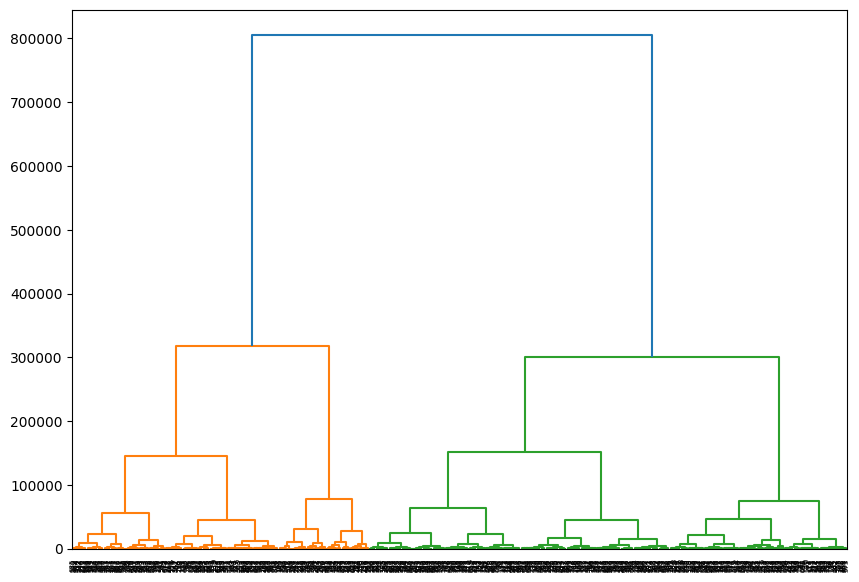

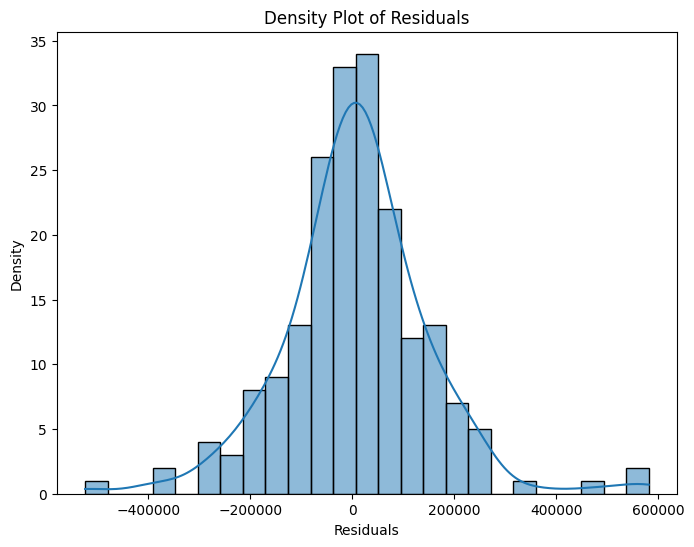

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
from scipy.cluster.hierarchy import dendrogram, linkage

optimal_min_samples_leaf = 8 #optimal value from problem 3
tree = DecisionTreeRegressor(min_samples_leaf=optimal_min_samples_leaf, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"R^2 on test set: {r2}")
print(f"RMSE on test set: {rmse}")

linked = linkage(X_train, 'ward') #plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

residuals = y_test - y_pred #plot the residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

The density of the residuals is symmetric and centered around 0.

**4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?**

In [15]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = math.sqrt(mean_squared_error(y_test, y_pred_linear))

print(f"Linear Regression R^2 on test set: {r2_linear}")
print(f"Linear Regression RMSE on test set: {rmse_linear}")

#compare the regression tree and linear regression
print(f"\nDecision Tree R^2: {r2}")
print(f"Decision Tree RMSE: {rmse}")

if r2 > r2_linear:
    print("\nDecision Tree Regression performs better.")
elif r2_linear > r2:
    print("\nLinear Regression performs better.")
else:
    print("\nBoth models perform equally well based on R^2.")
    if rmse < rmse_linear:
        print("Decision Tree performs better based on RMSE")
    else:
        print("Linear Regression performs better based on RMSE")

Linear Regression R^2 on test set: 0.8163910583949119
Linear Regression RMSE on test set: 145117.59426198687

Decision Tree R^2: 0.8213135837522154
Decision Tree RMSE: 143159.08892903704

Decision Tree Regression performs better.


The descision regression tree performs better, as it has a higher R^2 value and a lower RMSE value. This means that the model has a better fit and lower error.

**5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.**

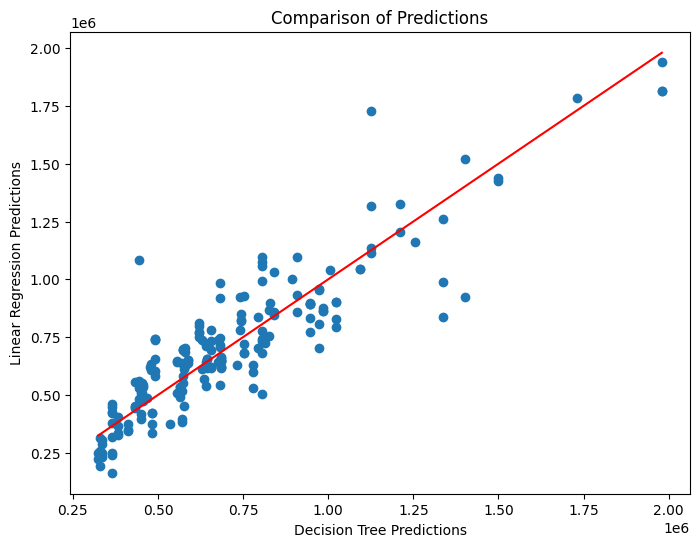

In [19]:
import matplotlib.pyplot as plt

tree_predictions = tree.predict(X_test) #predict prices
linear_predictions = linear_reg.predict(X_test)

plt.figure(figsize=(8, 6)) #scatterplot
plt.scatter(tree_predictions, linear_predictions)
plt.xlabel("Decision Tree Predictions")
plt.ylabel("Linear Regression Predictions")
plt.title("Comparison of Predictions")
plt.plot([min(tree_predictions), max(tree_predictions)], [min(tree_predictions), max(tree_predictions)], color='red') # Add a diagonal line
plt.show()

From the scatterplot, I see that as the predicted prices of the linear regression increases, the predicted prices of the decision tree increases. The relationship appears linear. This shows that the models agree on most of the price predictions. However, there are several outliers where the models may differ in their predictions. For example, when the linear regression predicted a price of about 1.1, the decision tree predicted under 0.5.

# **Q3.** This is a case study about classification and regression trees.


**1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.**

In [21]:
cancer = pd.read_csv('/content/trees/assignment/data/Breast Cancer METABRIC.csv', low_memory = False)
print(f"Number of observations: {cancer.shape[0]}")
print(f"Number of features: {cancer.shape[1]}")
cancer.head()

Number of observations: 2509
Number of features: 34


,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


**2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.**

In [23]:
import pandas as pd
numeric_cols = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']
categorical_cols = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']
cancer[numeric_cols] = cancer[numeric_cols].fillna(0) #handle missing variables
cancer[categorical_cols] = cancer[categorical_cols].fillna('Unknown')
cancer_encoded = pd.get_dummies(cancer, columns=categorical_cols, drop_first=True)

#create feature matrix
X = cancer_encoded[numeric_cols + list(cancer_encoded.columns[cancer_encoded.columns.str.startswith(('Tumor Stage_', 'Chemotherapy_', 'Cancer Type Detailed_'))])]
print(X.head())

   Tumor Size  Lymph nodes examined positive  Age at Diagnosis  \
0        22.0                           10.0             75.65   
1        10.0                            0.0             43.19   
2        15.0                            1.0             48.87   
3        25.0                            3.0             47.68   
4        40.0                            8.0             76.97   

   Tumor Stage_1.0  Tumor Stage_2.0  Tumor Stage_3.0  Tumor Stage_4.0  \
0            False             True            False            False   
1             True            False            False            False   
2            False             True            False            False   
3            False             True            False            False   
4            False             True            False            False   

   Tumor Stage_Unknown  Chemotherapy_Unknown  Chemotherapy_Yes  \
0                False                 False             False   
1                False          

**3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?**

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split

#handle missing
y = cancer_encoded['Overall Survival Status']
missing_indices = y.isnull()
X = X[~missing_indices]
y = y[~missing_indices]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_classifier = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
tree_classifier.fit(X_train, y_train)
y_pred = tree_classifier.predict(X_test)


<ipython-input-25-9f674536173c>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = X[~missing_indices]


Confusion Matrix:
[[163  70]
 [ 80  84]]


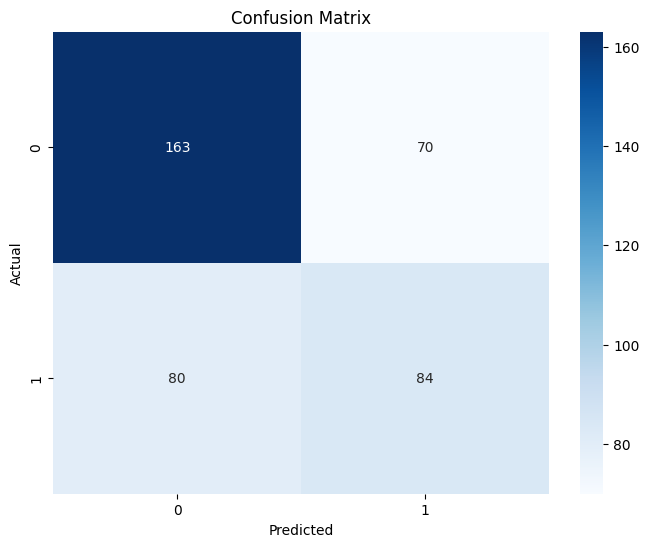

Accuracy: 0.6221662468513854


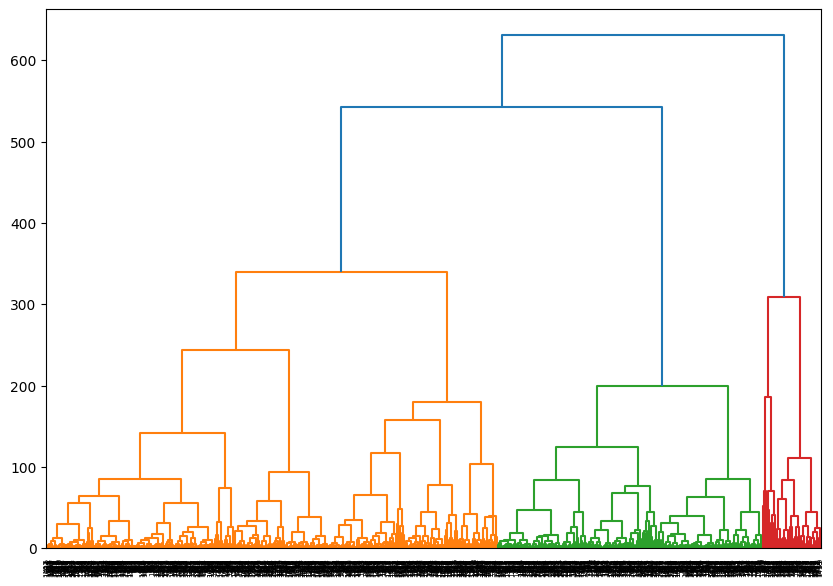

In [26]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X_train, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

The accuracy is 0.622, which shows that the model correctly classifies 62.2% of the instances in the test set.


**4. For your model in part three, compute three statistics:**
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?


In [28]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

print(f"True Positive Rate (Sensitivity): {TPR}")
print(f"True Negative Rate (Specificity): {TNR}")

if TPR > TNR:
    print("The model performs better with respect to sensitivity.")
elif TNR > TPR:
    print("The model performs better with respect to specificity.")
else:
    print("The model performs equally well with respect to sensitivity and specificity.")

True Positive Rate (Sensitivity): 0.5121951219512195
True Negative Rate (Specificity): 0.6995708154506438
The model performs better with respect to specificity.


The model performs better with the specificity approach, scoring 0.699 compared to 0.512 with sensitivity.

**5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?**

The best min_samples_leaf value is 69 with an R^2 score of 0.4897171357460134


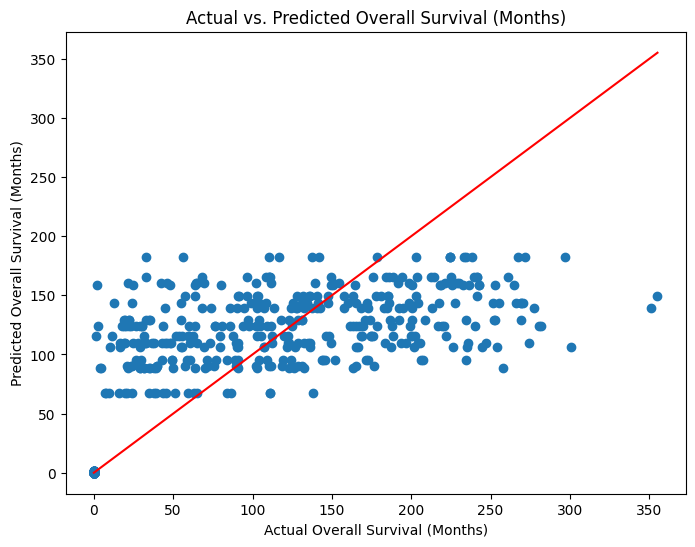

R-squared for the optimal model is 0.4897171357460134


In [30]:
import matplotlib.pyplot as plt
import numpy as np
cancer_encoded['Overall Survival (Months)'] = cancer_encoded['Overall Survival (Months)'].fillna(0)
X = cancer_encoded[numeric_cols + list(cancer_encoded.columns[cancer_encoded.columns.str.startswith(('Tumor Stage_', 'Chemotherapy_', 'Cancer Type Detailed_'))])]
y = cancer_encoded['Overall Survival (Months)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

r2_scores = []
for i in range(1, 201):
    tree = DecisionTreeRegressor(min_samples_leaf=i, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

best_min_samples_leaf = np.argmax(r2_scores) + 1
print(f"The best min_samples_leaf value is {best_min_samples_leaf} with an R^2 score of {np.max(r2_scores)}")

optimal_tree = DecisionTreeRegressor(min_samples_leaf=best_min_samples_leaf, random_state=42)
optimal_tree.fit(X_train, y_train)
y_pred_optimal = optimal_tree.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_optimal)
plt.xlabel("Actual Overall Survival (Months)")
plt.ylabel("Predicted Overall Survival (Months)")
plt.title("Actual vs. Predicted Overall Survival (Months)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()

r2_optimal = r2_score(y_test, y_pred_optimal)
print(f"R-squared for the optimal model is {r2_optimal}")

I would not highly recommend this model for clinical purposes. The R squared value is 0.48, which is not high enough/close enough to 1 to impliment for clinical purposes. This means that only 49% of the variance in overall survival is explained by the model.